### 1 Python libraries used in this notebook

In [201]:
import os
import pandas as pd
import numpy as np
import nltk
import tqdm
from tqdm import tnrange
# !pip install folium
import folium
import json
import webbrowser
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn

#### 1.1 Working directory check

In [2]:
os.chdir('E:/data incubator/')
os.getcwd()

'E:\\data incubator'

### 2 Loading Datasets

Be aware: the dataset_id for job listing datasets doesn't match the LinkedIn and Facebook datasets.

In [3]:
# specify data types for faster loading
dtype = {'dataset_id': int, 'listing_id': str, 'domain': str, 'title': str, 'brand': str, 'category': str, 'locality': str, 
         'region': str, 'country': str, 'number_of_openings': float, 'location_string': str}
# dataframes of job posting
df1 = pd.read_csv("temp_datalab_records_job_listings 1.csv", dtype=dtype)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# code for analyzing similar datasets
# df2 = pd.read_csv("temp_datalab_records_job_listings 2.csv", dtype=dtype)
# df3 = pd.read_csv("temp_datalab_records_job_listings 3.csv", dtype=dtype)
# df4 = pd.read_csv("temp_datalab_records_job_listings 4.csv", dtype=dtype)
# df5 = pd.read_csv("temp_datalab_records_job_listings 5.csv", dtype=dtype)
# df6 = pd.read_csv("temp_datalab_records_job_listings 6.csv", dtype=dtype)

In [233]:
# df1['as_of_date']

#### 2.1 Add US states to abbreviation dict for mapping

In [232]:
us_states_abbreviation = {
    'Alabama': 'AL','AL':'AL',
    'Alaska': 'AK','AK':'AK',
    'Arizona': 'AZ','AZ':'AZ',
    'Arkansas': 'AR','AR':'AR',
    'California': 'CA','CA':'CA',
    'Colorado': 'CO','CO':'CO',
    'Connecticut': 'CT','CT':'CT',
    'Delaware': 'DE','DE':'DE',
    'District of Columbia': 'DC','DC':'DC',
    'Florida': 'FL','FL':'FL',
    'Georgia': 'GA','GA':'GA',
    'Hawaii': 'HI','HI':'HI',
    'Idaho': 'ID','ID':'ID',
    'Illinois': 'IL','IL':'IL',
    'Indiana': 'IN','IN':'IN',
    'Iowa': 'IA','IA':'IA',
    'Kansas': 'KS','KS':'KS',
    'Kentucky': 'KY','KY':'KY',
    'Louisiana': 'LA','LA':'LA',
    'Maine': 'ME','ME':'ME',
    'Maryland': 'MD','MD':'MD',
    'Massachusetts': 'MA','MA':'MA',
    'Michigan': 'MI','MI':'MI',
    'Minnesota': 'MN','MN':'MN',
    'Mississippi': 'MS','MS':'MS',
    'Missouri': 'MO','MO':'MO',
    'Montana': 'MT','MT':'MT',
    'Nebraska': 'NE','NE':'NE',
    'Nevada': 'NV','NV':'NV',
    'New Hampshire': 'NH','NH':'NH',
    'New Jersey': 'NJ','NJ':'NJ',
    'New Mexico': 'NM','NM':'NM',
    'New York': 'NY','NY':'NY',
    'North Carolina': 'NC','NC':'NC',
    'North Dakota': 'ND','ND':'ND',
    'Northern Mariana Islands':'MP','MP':'MP',
    'Ohio': 'OH','OH':'OH',
    'Oklahoma': 'OK','OK':'OK',
    'Oregon': 'OR','OR':'OR',
    'Palau': 'PW','PW':'PW',
    'Pennsylvania': 'PA','PA':'PA',
    'Puerto Rico': 'PR','PR':'PR',
    'Rhode Island': 'RI','RI':'RI',
    'South Carolina': 'SC','SC':'SC',
    'South Dakota': 'SD','SD':'SD',
    'Tennessee': 'TN','TN':'TN',
    'Texas': 'TX','TX':'TX',
    'Utah': 'UT','UT':'UT',
    'Vermont': 'VT','VT':'VT',
    'Virgin Islands': 'VI','VI':'VI',
    'Virginia': 'VA','VA':'VA',
    'Washington': 'WA','WA':'WA',
    'Washington, DC': 'DC','DC':'DC',
    'West Virginia': 'WV','WV':'WV',
    'Wisconsin': 'WI','WI':'WI',
    'Wyoming': 'WY','WY':'WY',
}

state_abbrev = {state: abbrev for state, abbrev in us_states_abbreviation.items()}

# Map state names to state name abbreviations for clean data
df1['state abbrev'] = df1['region'].map(state_abbrev)
# df1['state abbrev'][df1['state abbrev']=='NC']

In [64]:
len(df1[df1['state abbrev']==states[2]])

876745

### 3 Exploratory Data Analysis
#### 3.1 Job posting counts across the US

The result is linked here - [job posting map link]()

In [234]:
job_count = pd.DataFrame(columns=['state abbrev', 'job count'])
for i in tnrange(len(states)):
        job_count = job_count.append({'state abbrev': states[i], 
                                      'job count': len(df1[df1['state abbrev']==states[i]])}, ignore_index=True)
        pass
job_count = job_count.dropna()    

In [235]:
# job counts plot for all states

# the basemap url is 'https://github.com/python-visualization/folium/tree/master/examples/data/us-states.json'
# download to folder before making choropleth map with folium

state_geo = os.path.join('us-states.json')

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)

# index_names = job_count[(job_count['state abbrev'] == 'PR') | (job_count['state abbrev'] == 'HI') | 
#                         (job_count['state abbrev'] == 'DC') | (job_count['state abbrev'] == 'MP')].index
# job_counts = job_count.drop(index_names)
# Add the color for the chloropleth:
m.choropleth(
    geo_data=state_geo,
     name='choropleth',
     data=job_count,
     columns=['state abbrev', 'job count'],
     key_on='feature.id',
     fill_color='YlGn',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='Job posting counts in 2018')

folium.LayerControl().add_to(m)
m.save('choropleth.html')

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 3.2 Frequent job titles in first 10 states with most job postings
##### 3.2.1 First 10 states with most job postings in 2018

In [227]:
job_count_sorted = job_count.sort_values(by='job count', ascending=False)
job_count_sorted = job_count_sorted.reset_index(drop=True)
top_states = list(job_count_sorted['state abbrev'].iloc[0:10])

##### 3.2.2 job function frequency of first 10 states with most job postings

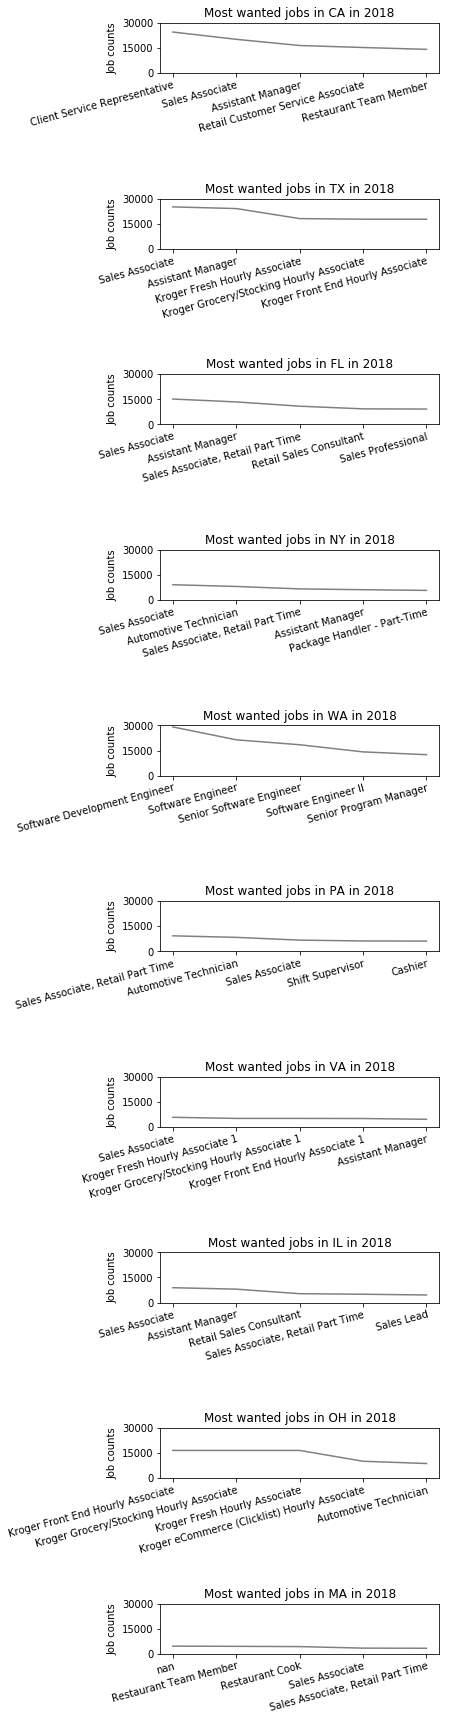

In [238]:
fig = plt.figure(figsize=(5,30))
fig.tight_layout()
fig.subplots_adjust(hspace=2.5)
top_num = 4
for i in range(0, 10):
    ax = plt.subplot(10, 1, i+1)
    
    # frequency of job titles
    word_dist = nltk.FreqDist(df1['title'][df1['state abbrev']==top_states[i]])
    rslt=pd.DataFrame(word_dist.most_common(top_num+1), 
                      columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    rslt= rslt.reset_index(drop=False)
    ax.plot(rslt['index'], rslt['Frequency'], color = 'black', alpha = 0.5)
    
    ax.set_title('Most wanted jobs in '+ str(top_states[i] + ' in 2018'))
    ax.set_xticks([0,1,2,3,4]) 
    ax.set_xticklabels(rslt['Word'], rotation=15, rotation_mode="anchor", ha="right")
    ax.set_ylim(0, 30000)
    ax.set_yticks([0, 15000, 30000])
    ax.set_ylabel('Job counts')